# Analysis Strategy 

Following Bach: 
    - fit several models with different models. (I could compare to other logistic regressions). These models should encompass all questions about risk aversion and ambiguity. 
    
    - Model comparison to answer the questions
         1. Is revealed probability (ML) or Bayes adjusted probability better accounting for choice? (Compare M0 v M1) or families using M1?
         1. Are choices influenced by ambiguity?
         2. Does the level of ambiguity (entropy influence choice?)
         3. What mechanism is the most likely explanation? 
         
     - Do any models reveal differences in condition more than other models? 

Ref: 
Bach, D. R., Hulme, O., Penny, W. D., & Dolan, R. J. (2011). The known unknowns: neural representation of second-order uncertainty, and ambiguity. Journal of Neuroscience, 31(13), 4811-4820.

# Assessing Component Functions

Here I've just explored the functions that make up the model. Most of these figures can be ignored. 


In [400]:
import sys
sys.path.append("../functions/")
import imp

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
%matplotlib inline

In [402]:
#for data preprocessing
import Scripts_Data_Processing
imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

import Bach_models
imp.reload(Bach_models)
from Bach_models import *

import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

In [5]:
# getting example data 
task = 'loss'
df = load_single_subject('12',task=task,which_trial='all')
df = df.loc[df['gain_or_loss_trial']=='loss',:]

In [6]:
#df['mag_right']

In [7]:
m_r,m_l,p_r,p_l,a_r,a_l,n_r,n_l = unpack_columns(df)


In [9]:
# transforming the parameters using a normal cdf (probit)

# import scipy.stats as stats
# x = np.arange(-10,10)
# plt.plot(x,stats.norm.cdf(x)*10)

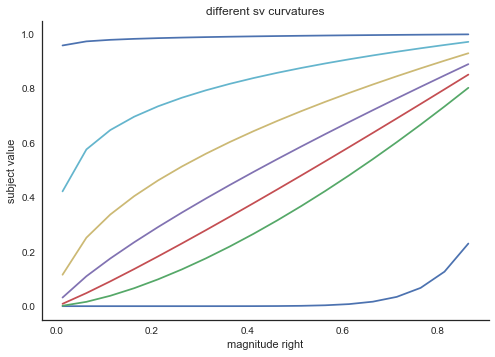

In [10]:
# diff
m = np.arange(np.min(m_r),np.max(m_r),0.05)
plt.plot(m,m**10)
plt.plot(m,m**1.5)
plt.plot(m,m**1.1)
plt.plot(m,m**0.8)
plt.plot(m,m**0.5)
plt.plot(m,m**0.2)
plt.plot(m,m**0.01)
plt.xlabel('magnitude right')
plt.ylabel('subject value')
plt.title('different sv curvatures')
sns.despine()

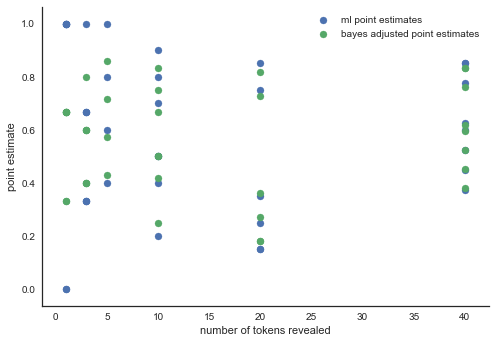

In [11]:
s_p_r = (p_r*n_r+1)/(n_r+2)
plt.scatter(n_r[a_r==1],p_r[a_r==1.0],label='ml point estimates')
plt.scatter(n_r[a_r==1],s_p_r[a_r==1.0],label='bayes adjusted point estimates')
plt.legend()
sns.despine()
plt.xlabel('number of tokens revealed')
plt.ylabel('point estimate')

This is just useful to keep in mind. It shows how much probability point estimates are adjusted by Bayes rule. 


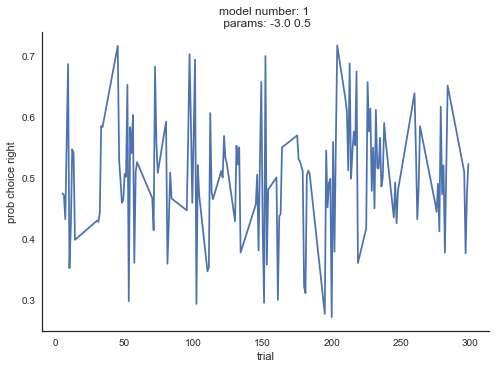

In [12]:
params = [-3.0,0.5]
model_number = 1
task='loss'

# load data
df = load_single_subject('12',task=task,which_trial='all')
df = df.loc[df['gain_or_loss_trial']==task,:]
prob_y = model(params,df,model_number=model_number)

plt.plot(prob_y)
plt.title('model number: {0} \n params: {1} {2}'.format(model_number,params[0],params[1]))
sns.despine()
plt.xlabel('trial')
plt.ylabel('prob choice right')

# Optimization

- using SLSQP with bounds. 
- attempted re-parameterizing the parameters by probit transform. parameter = norm.cdf(parameter_in_optimization)*upper_bound. 

- issues I need to be careful with. 
    - parameters values obtained are meaningful 
    - maximum values are obtained. 
    - large values in parameters aren't chosen with minimal influence on loglik. (could put priors)
    

# Results: Parameter Scatters / Bars

- just the usual parameter graphs. 


In [90]:
vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', 
           '19', '20', '22', '23', '25', '26', '27', '28', '29', '30',
          '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']

### Model: Splitting M,P,A

$$ p(choose_r) = \frac{1}{1+exp(-1(\beta_0+\beta_1(P_r-P_l)+\beta_2(M_r-M_l)+\beta_3(A_r-A_l)))}$$


Parameters: $\beta_{0-4} $


In [389]:
import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

In [99]:
kwargs = {}
kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_singRL,
                              kwargs,
                              'log0',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])


In [404]:
model_param_df = pd.read_csv('../output/model_fits/model_param_df_log0.csv',index_col=0)

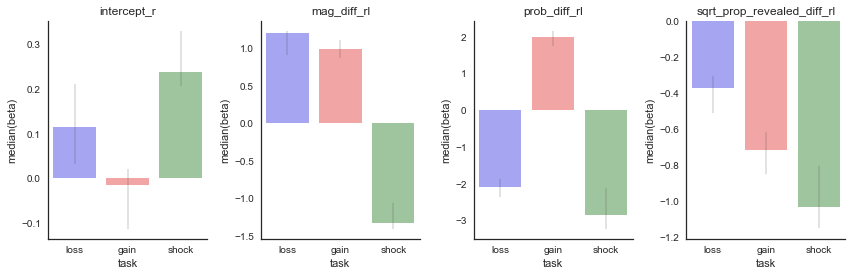

In [405]:
plot_params_bar_in_sep_axes(model_param_df,stripplot=False,estimator=np.median)

### Model 0: Baseline

Does not specify a potential influence of ambiguity on choice. 

$$ p(choose_r) = \frac{1}{1+exp(\lambda(EU_r-EU_l))}$$
$ EU_r = p_rm_r^\beta $

$ EU_l = p_lm_l^\beta $

Parameters: $\lambda, \beta $

$\beta<1$ is means that you value a small more certain magnitude. (though it seems to peak around 0.7 for this example below). So I think interpretting above or below 1 is more meaningful than how far. 



In [186]:
beta = 1.0
print('beta {0}'.format(beta))
print('ev:')
print(0.4*80**beta - 0.8*40**beta)
print('')

beta = 0.2
print('beta {0}'.format(beta))
print('ev:')
print(0.4*80.0**beta - 0.8*40.0**beta)
print('')

beta = 1.1
print('beta {0}'.format(beta))
print('ev:')
print(0.4*80**beta - 0.8*40**beta)
print('')

beta 1.0
ev:
0.0

beta 0.2
ev:
-0.7121237369608919

beta 1.1
ev:
3.321390014605207



In [193]:
import Bach_models
imp.reload(Bach_models)
from Bach_models import *

In [195]:
# fitting single subject 
task = 'gain'
model_number = 0
df = load_single_subject('22',task=task,which_trial='all')
results = fit_model_bach(df,task=task,model_number=model_number)
#results

In [196]:
#stats.norm.cdf(results['params']['beta'])*5.0

In [197]:
# plt.plot(results['pred_y'])
# plt.title('model number: {0} \n params: {1} {2}'.format(model_number,params[0],params[1]))
# sns.despine()
# plt.xlabel('trial')
# plt.ylabel('prob choice right')

In [198]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=0
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach0',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])


In [408]:
# readig data back in 
model_param_df = pd.read_csv('../output/model_fits/model_param_df_bach0.csv',index_col=0)
model_summary_df = pd.read_csv('../output/model_fits/model_summary_df_bach0.csv',index_col=0)


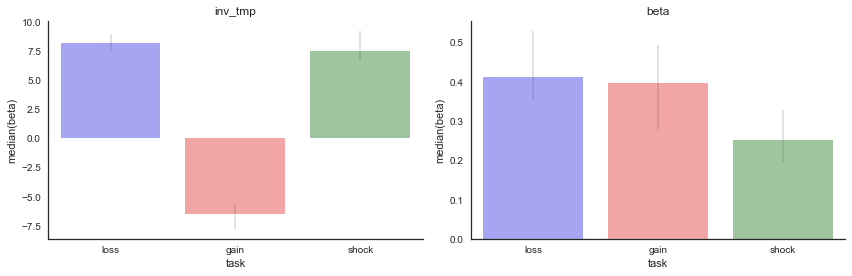

In [409]:
plot_params_bar_in_sep_axes(model_param_df,stripplot=False,estimator=np.median)

In [395]:
# l = param_df.loc[param_df['condition']=='loss',:].sort_values(by='MID')
# g = param_df.loc[param_df['condition']=='gain',:].sort_values(by='MID')
# plt.scatter(l['beta'],g['beta'])
# plt.plot(np.arange(0,5),np.arange(0,5))

### Side Model: Baseline + RL intercept

same thing but + b0, to potentially be a fairer comparison with logregs. 

$$ p(choose_r) = \frac{1}{1+exp(\lambda(EU_r-EU_l)+\beta_0)}$$
$ EU_r = p_rm_r^\beta $

$ EU_l = p_lm_l^\beta $

Parameters: $\lambda, \beta,\beta_0 $


In [257]:
import Bach_models
imp.reload(Bach_models)
from Bach_models import *

In [260]:
task = 'gain'
model_number = 100
df = load_single_subject('22',task=task,which_trial='all')
results = fit_model_bach(df,task=task,model_number=model_number)
#results

In [261]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=100
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach100',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])


In [416]:
# load model fits 
model_summary_df_bach0 = pd.read_csv('../output/model_fits/model_summary_df_bach0.csv',index_col=0)
model_summary_df_bach0['model']='bach0'
model_summary_df_bach100 = pd.read_csv('../output/model_fits/model_summary_df_bach100.csv',index_col=0)
model_summary_df_bach100['model']='bach100'
model_summary_df = pd.concat((model_summary_df_bach0,model_summary_df_bach100))

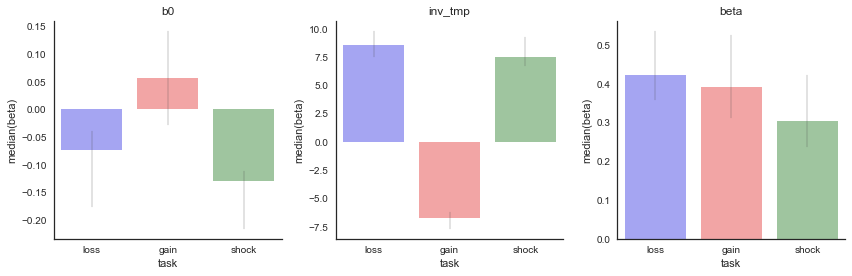

In [414]:
model_param_df_bach100 = pd.read_csv('../output/model_fits/model_param_df_bach100.csv',index_col=0)
plot_params_bar_in_sep_axes(model_param_df_bach100,stripplot=False,estimator=np.median)

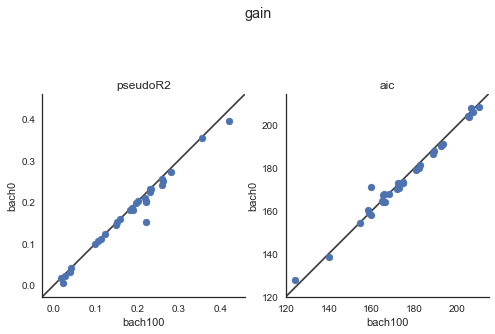

In [417]:
plot_two_model_comparison_scatter(model_summary_df,'bach100','bach0')

Different risk preference fittings though when using an intercept. 

### Model 1: 

Accounts for adjusting visible probabilities based on bayes theorem. 

$$ p(choose_r) = \frac{1}{1+exp(\tau(EU_r-EU_l))}$$
$ EU_r = p(outcome_r|tokens_r)m_r^B $

$ p(outcome_r|tokens_r) \propto p(tokens_r|outcome_r)p(outcome_r) $


In [114]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=1
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach1',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])



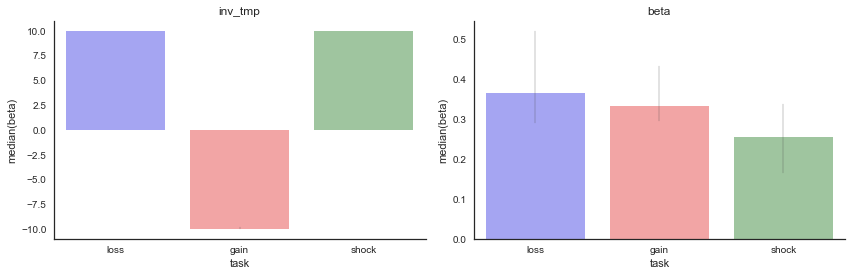

In [418]:
model_param_df_bach100 = pd.read_csv('../output/model_fits/model_param_df_bach1.csv',index_col=0)
plot_params_bar_in_sep_axes(model_param_df_bach100,stripplot=False,estimator=np.median)

Different risk preference fittings though when using an intercept. 

### Model 2: 

Accounts for adjusting visible probabilities based on bayes theorem. 

$$ p(choose_r) = \frac{1}{1+exp(\tau(EU_r-EU_l))}$$
$ EU_r = p(outcome_r|tokens_r)m_r^{\beta_n} $

$\beta_n$ differs for unambiguous, ambiguous trials

$ p(outcome_r|tokens_r) \propto p(tokens_r|outcome_r)p(outcome_r) $


In [162]:
import Bach_models
imp.reload(Bach_models)
from Bach_models import *

In [163]:
# fitting single subject 
task = 'gain'
model_number = 2
df = load_single_subject('22',task=task,which_trial='all')
results = fit_model_bach(df,task=task,model_number=model_number)
#results

In [269]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=2
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach2',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])



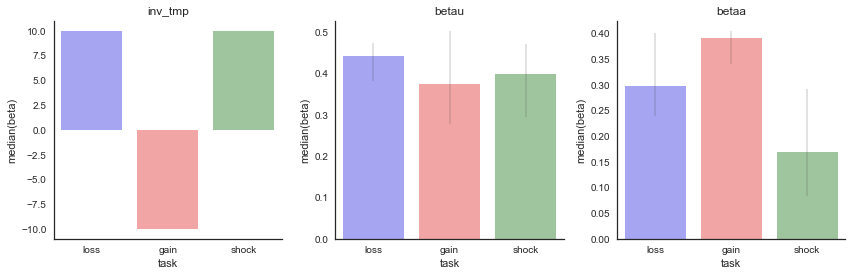

In [423]:
model_param_df_bach100 = pd.read_csv('../output/model_fits/model_param_df_bach2.csv',index_col=0)
plot_params_bar_in_sep_axes(model_param_df_bach100,stripplot=False,estimator=np.median)

### Model 3: 

Accounts for adjusting visible probabilities based on bayes theorem. 

$$ p(choose_r) = \frac{1}{1+exp(\tau(EU_r-EU_l))}$$
$ EU_r = p(outcome_r|tokens_r)m_r^{\beta} + a_n $

$a_n$ additional constant value for ambiguous trials (basically a categorical term). 



In [287]:
import Bach_models
imp.reload(Bach_models)
from Bach_models import *

In [290]:
# fitting single subject 
task = 'gain'
model_number = 3
df = load_single_subject('22',task=task,which_trial='all')
results = fit_model_bach(df,task=task,model_number=model_number)
#results

In [292]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=3
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach3',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])



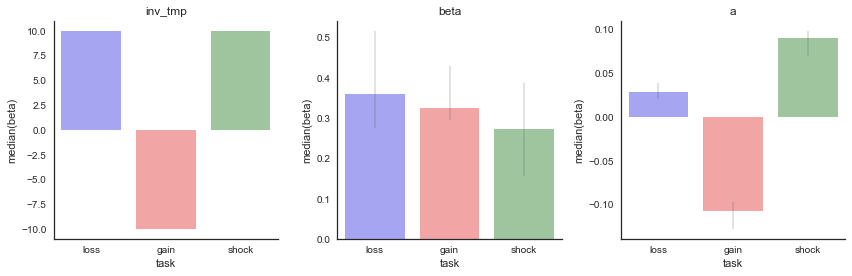

In [424]:
model_param_df_bach100 = pd.read_csv('../output/model_fits/model_param_df_bach3.csv',index_col=0)
plot_params_bar_in_sep_axes(model_param_df_bach100,stripplot=False,estimator=np.median)

In [305]:
#df['ambiguityLevel_l']

But it's capturing the effects of the intercept as well. 

### Model 13: 

Accounts for adjusting visible probabilities based on bayes theorem. 

$$ p(choose_r) = \frac{1}{1+exp(\tau(EU_r-EU_l))}$$
$ EU_r = p(outcome_r|tokens_r)m_r^{\beta} + a_n*H $

$a_n$ additional constant value for ambiguous trials (basically a categorical term). 



In [425]:
import Bach_models
imp.reload(Bach_models)
from Bach_models import *

In [427]:
# fitting single subject 
task = 'gain'
model_number = 13
df = load_single_subject('22',task=task,which_trial='all')
results = fit_model_bach(df,task=task,model_number=model_number)
#results

In [428]:
# fitting all subjects # 
kwargs = {}
kwargs['model_number']=13
all_subs_model_fits_all_tasks(vp_list,
                              fit_model_bach,
                              kwargs,
                              'bach13',
                              resultnames=['bic','aic','pseudoR2','pred_acc'])



In [429]:
# readig data back in 
model_param_df = pd.read_csv('../output/model_fits/model_param_df_bach13.csv',index_col=0)

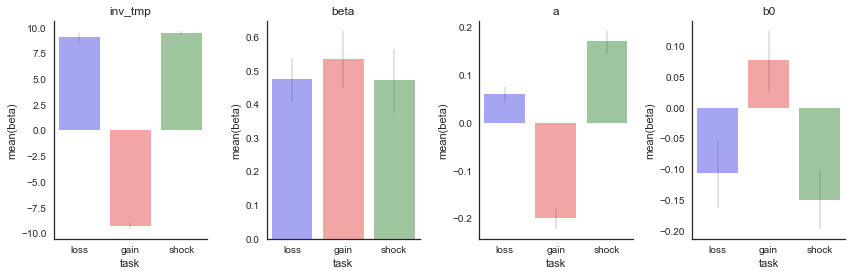

In [430]:
plot_params_bar_in_sep_axes(model_param_df,stripplot=False)

# Results: Model Comparison 

- save out and load back in after SPM



In [431]:
# load all model summary dataframes 
for m,model in enumerate(['bach0','bach1','bach2','bach3','bach13','log0']):
        
    model_summary_df_tmp = pd.read_csv('../output/model_fits/model_summary_df_'+model+'.csv',index_col=0)
    model_summary_df_tmp['model']=model
    
    if m==0:
        model_summary_df=model_summary_df_tmp.copy()
    else:
        model_summary_df = pd.concat((model_summary_df,model_summary_df_tmp))


### Table

In [432]:
model_summary_df.groupby(by=['task','model']).agg(np.mean)

bic         aic  pseudoR2  pred_acc
task  model                                             
gain  bach0   181.003990  174.982720  0.172151  0.714000
      bach1   185.874578  179.853308  0.148499  0.705778
      bach13  160.724995  148.682453  0.319222  0.776222
      bach2   172.763432  163.731526  0.236432  0.726000
      bach3   158.674340  149.642434  0.304717  0.765333
      log0    158.523982  146.481440  0.329854  0.773778
loss  bach0   170.880128  164.858858  0.219421  0.744000
      bach1   174.601853  168.580583  0.201322  0.737778
      bach13  164.978332  152.935791  0.297101  0.774444
      bach2   164.722059  155.690153  0.273721  0.755333
      bach3   163.662299  154.630393  0.278890  0.764444
      log0    166.466554  154.424013  0.289859  0.766667
shock bach0   165.972853  159.951582  0.243454  0.770222
      bach1   169.288299  163.267029  0.227395  0.768000
      bach13  152.033903  139.991361  0.359967  0.799333
      bach2   162.112192  153.080286  0.286268  0.767333
      bach3   156.940045  147.908139  0.311558  0.771333
      log0    141.543618  129.501077  0.411081  0.817333

### Mscl Pairwise Comparisons

In [342]:
# load model fits 
model_summary_df_bach0 = pd.read_csv('../output/model_fits/model_summary_df_bach13.csv',index_col=0)
model_summary_df_bach0['model']='bach13'
model_summary_df_log0 = pd.read_csv('../output/model_fits/model_summary_df_log0.csv',index_col=0)
model_summary_df_log0['model']='log0'
model_summary_df = pd.concat((model_summary_df_bach0,model_summary_df_log0))

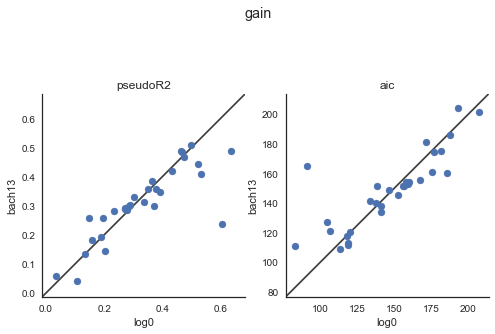

In [348]:
plot_two_model_comparison_scatter(model_summary_df,'log0','bach13',task='gain')

### Comparing Model Fit between Original Log Reg and Bach0 




In [350]:
# load model fits 
model_summary_df_bach0 = pd.read_csv('../output/model_fits/model_summary_df_bach0.csv',index_col=0)
model_summary_df_bach0['model']='bach0'
model_summary_df_log0 = pd.read_csv('../output/model_fits/model_summary_df_log0.csv',index_col=0)
model_summary_df_log0['model']='log0'
model_summary_df = pd.concat((model_summary_df_bach0,model_summary_df_log0))

In [351]:
model_summary_df.head()

,MID,bic,aic,pseudoR2,pred_acc,task,model
0,vp06,183.570919,177.549649,0.164438,0.793333,loss,bach0
1,vp07,179.174054,173.152784,0.183929,0.733333,loss,bach0
2,vp10,162.072290,156.051019,0.264159,0.773333,loss,bach0
3,vp11,129.927320,123.906050,0.423078,0.866667,loss,bach0
4,vp12,134.749652,128.728382,0.399490,0.813333,loss,bach0


In [352]:
import Plot_models
imp.reload(Plot_models)
from Plot_models import *

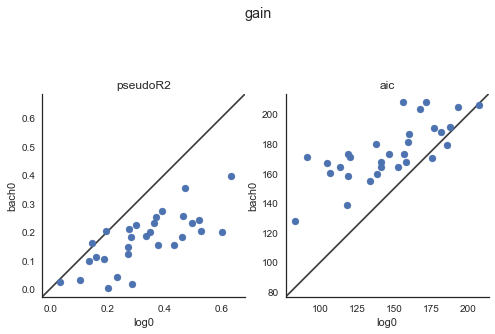

In [353]:
plot_two_model_comparison_scatter(model_summary_df,'log0','bach0')

# Trait Analyses



In [313]:
import Trait_Data
imp.reload(Trait_Data)
from Trait_Data import *

In [314]:
STAI1_df = load_trait_data(sheet = 'STAI', header = 3, lastcol = 30, start = 43, end = 49)
STAI1_df = STAI1_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_1', 'Positive affect': 'PositiveAffect_1', 'Trait anxiety': 'TraitAnxiety_1', 'Trait anxiety sub': 'TraitAnxietySub_1', 'Trait depression sub': 'TraitDepressionSub_1'})
#STAI1_df.head()

In [315]:
STAI2_df = load_trait_data(sheet = 'STAI2', header = 3, lastcol = 30, start = 43, end = 49)
STAI2_df = STAI2_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_2', 'Positive affect': 'PositiveAffect_2', 'Trait anxiety': 'TraitAnxiety_2', 'Trait anxiety sub': 'TraitAnxietySub_2', 'Trait depression sub': 'TraitDepressionSub_2'})
#STAI2_df.head()

In [317]:
STAI3_df = load_trait_data(sheet = 'STAI3', header = 3, lastcol = 8, start = 43, end = 49)
STAI3_df = STAI3_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_3', 'Positive affect': 'PositiveAffect_3', 'Trait anxiety': 'TraitAnxiety_3', 'Trait anxiety sub': 'TraitAnxietySub_3', 'Trait depression sub': 'TraitDepressionSub_3'})
#STAI3_df.head()

In [318]:
STAI_df = STAI1_df.merge(STAI2_df, 'left')
STAI_df = STAI_df.merge(STAI3_df, 'left', on='MID')
STAI_df['StateAnxiety'] = STAI_df[['StateAnxiety_1', 'StateAnxiety_2', 'StateAnxiety_3']].mean(axis=1)
STAI_df['PositiveAffect'] = STAI_df[['PositiveAffect_1', 'PositiveAffect_2', 'PositiveAffect_3']].mean(axis=1)
STAI_df['TraitAnxiety'] = STAI_df[['TraitAnxiety_1', 'TraitAnxiety_2', 'TraitAnxiety_3']].mean(axis=1)
STAI_df['TraitAnxietySub'] = STAI_df[['TraitAnxietySub_1', 'TraitAnxietySub_2', 'TraitAnxietySub_3']].mean(axis=1)
STAI_df['TraitDepressionSub'] = STAI_df[['TraitDepressionSub_1', 'TraitDepressionSub_2', 'TraitDepressionSub_3']].mean(axis=1)


In [320]:
#STAI_df